<a href="https://colab.research.google.com/github/Amaliastf/PCVK_Ganjil_2023/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Muat 2 library berikut sebagai tahapan persiapan

In [27]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [25]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_Per7"

# Membaca gambar
src = cv2.imread(path_plate)

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    img_path = os.path.join(path_plate, name_file)
    src = cv2.imread(img_path)
    blurred = src.copy()
    gray = blurred.copy()

    # Filtering
    for i in range(10):
        blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(ret, bw.shape)

141.0 (488, 800)
156.0 (680, 1055)
88.0 (338, 600)
144.0 (707, 1070)
168.0 (300, 493)
168.0 (300, 493)
140.0 (381, 608)
160.0 (636, 996)


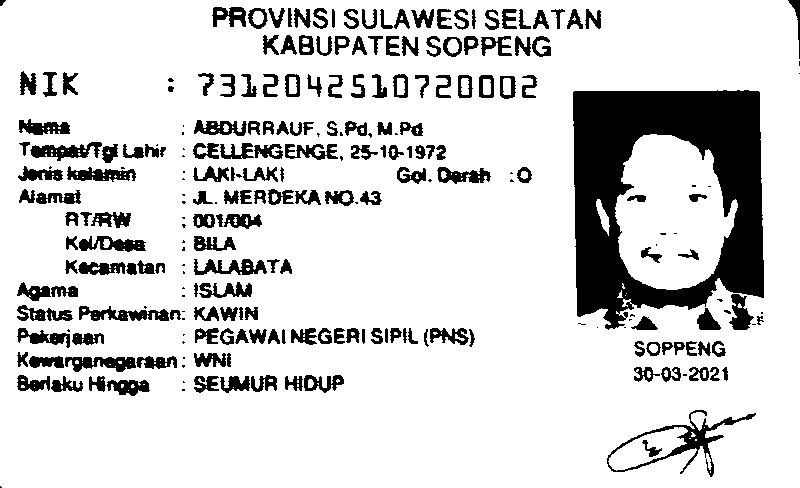

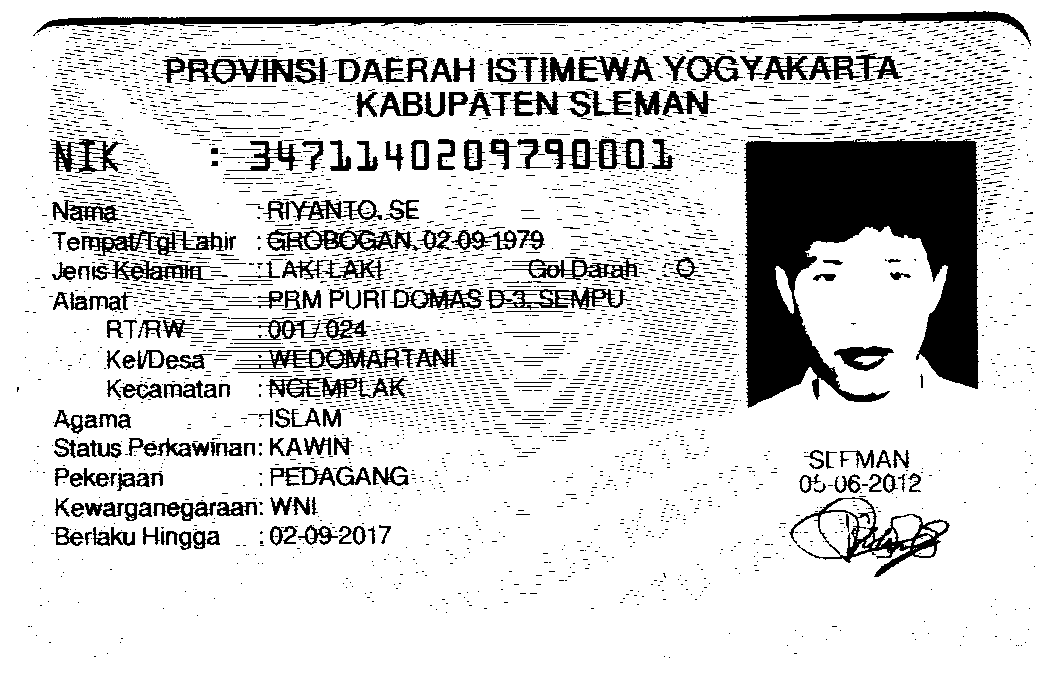

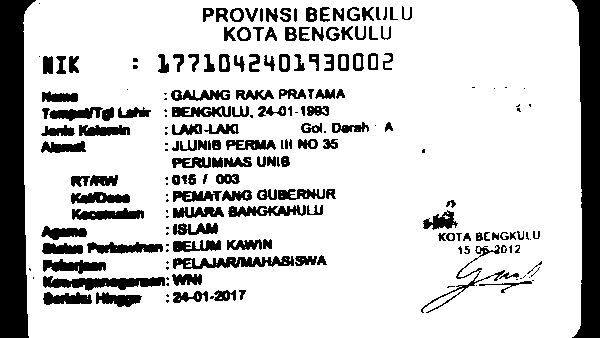

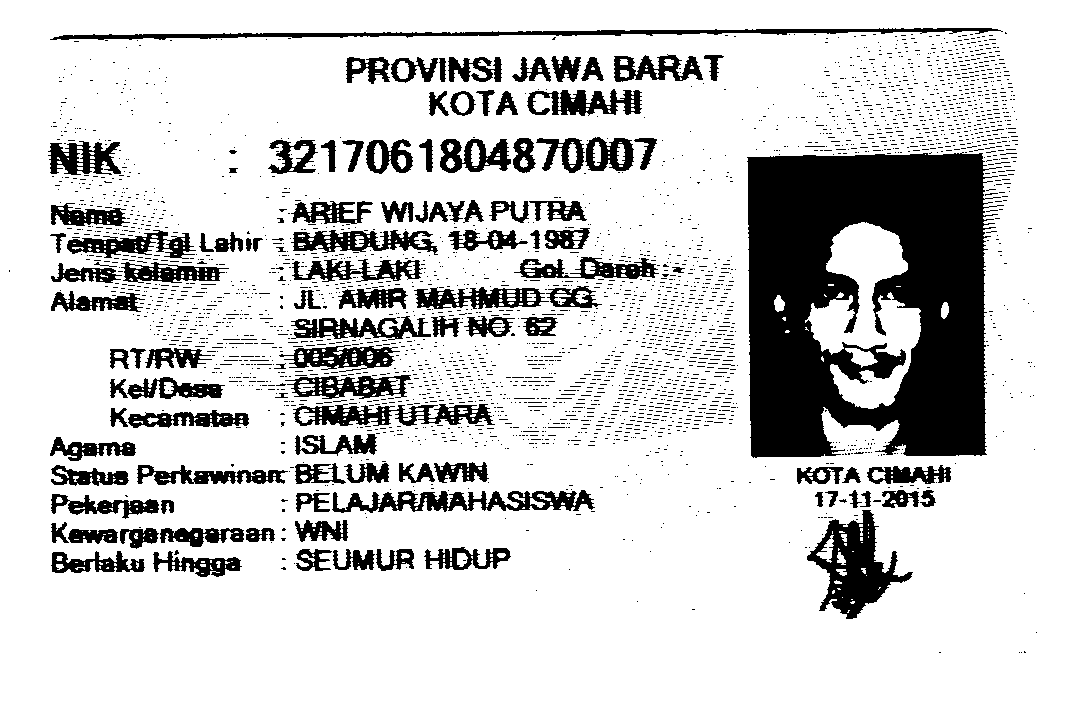

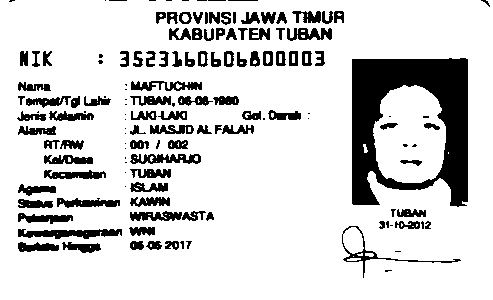

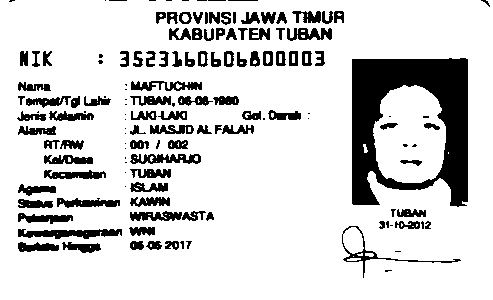

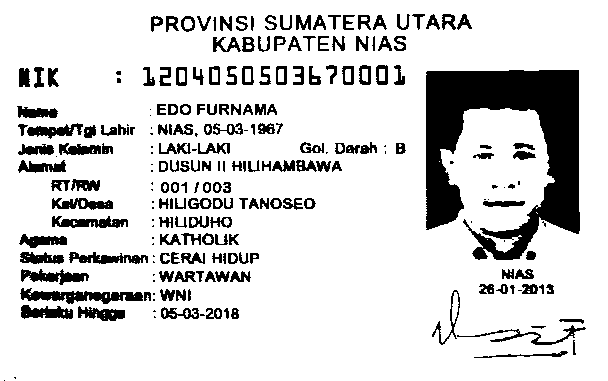

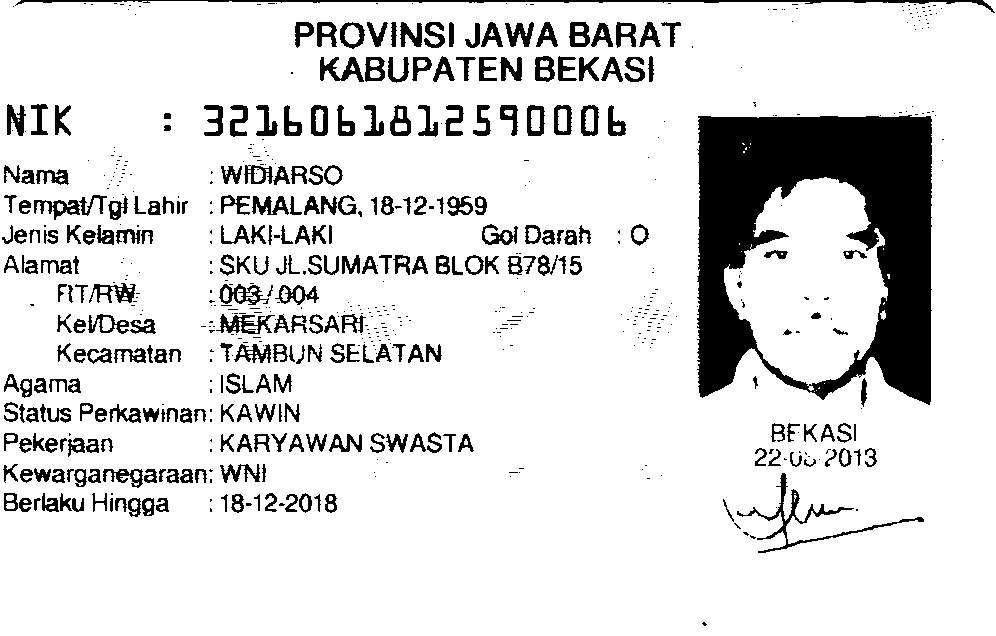

In [26]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_Per7"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    img_path = os.path.join(path_plate, name_file)
    src = cv2.imread(img_path)
    blurred = src.copy()
    gray = blurred.copy()

    # Filtering
    for i in range(10):
        blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan citra
    cv2_imshow(bw)


6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

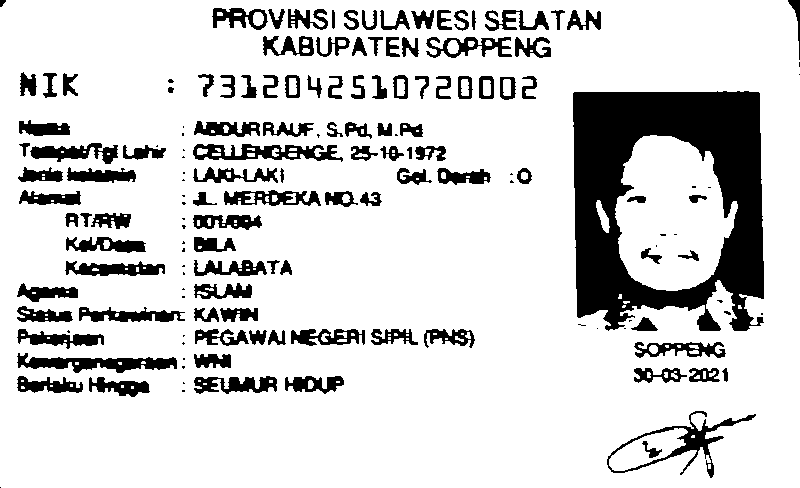

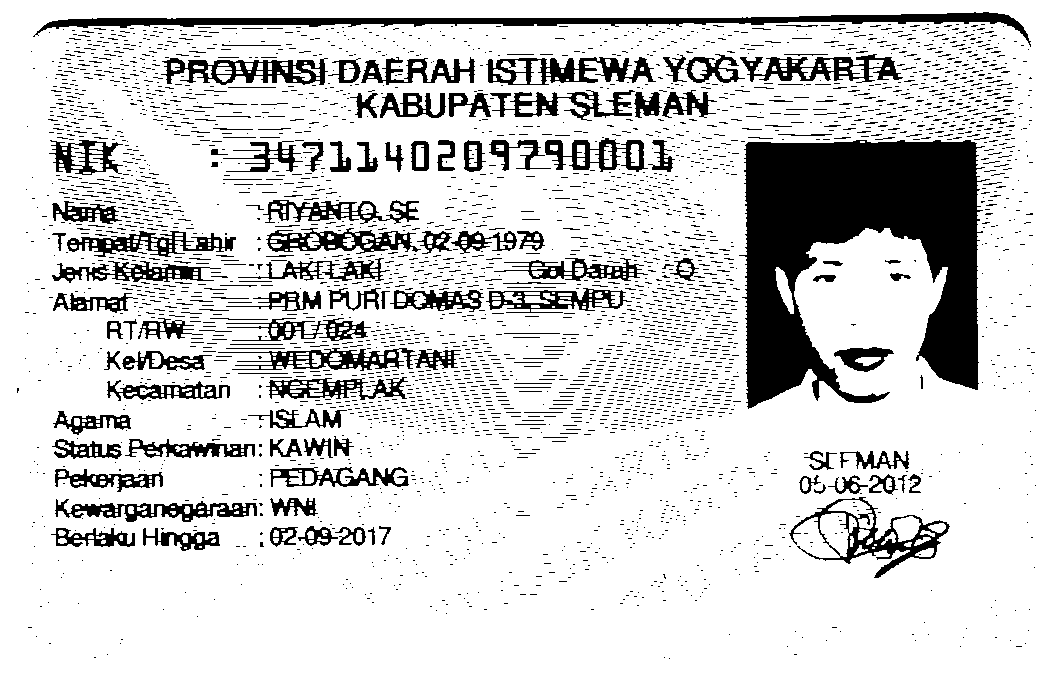

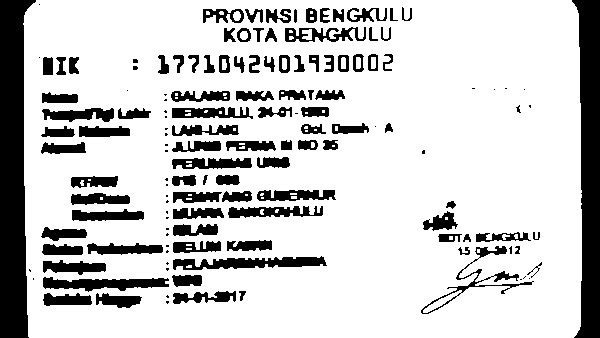

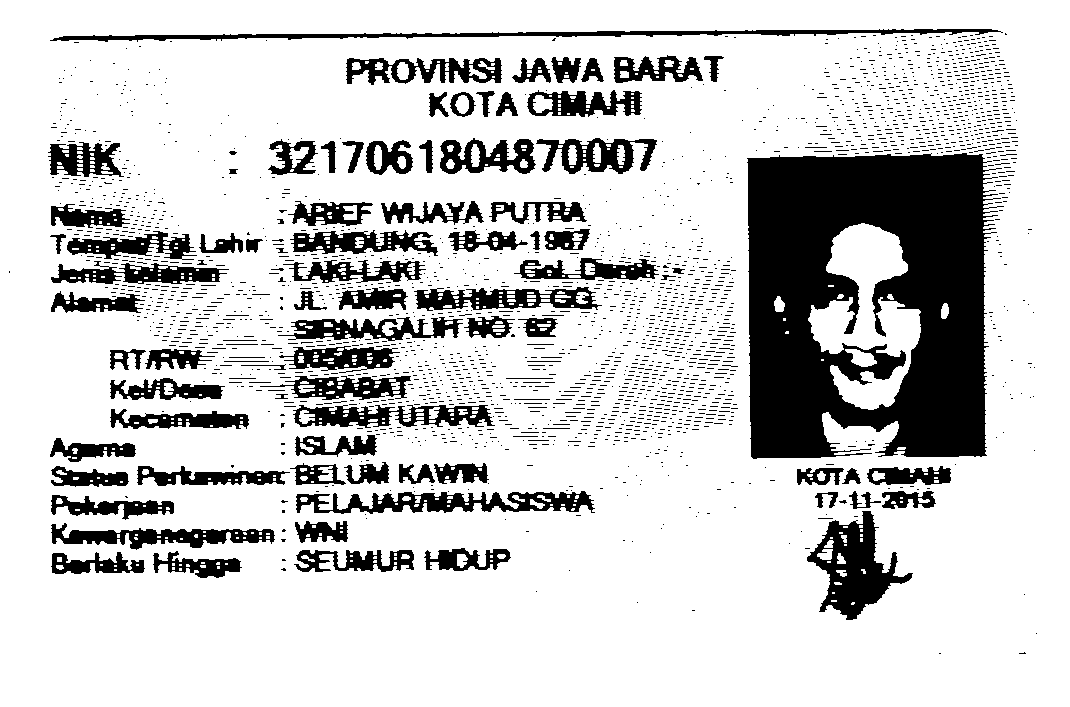

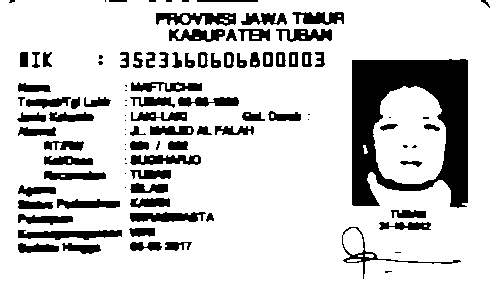

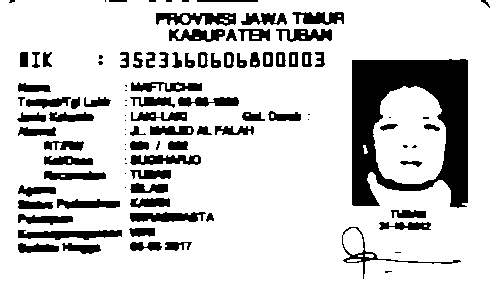

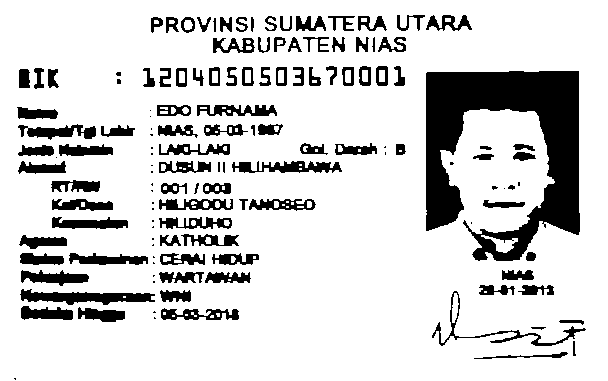

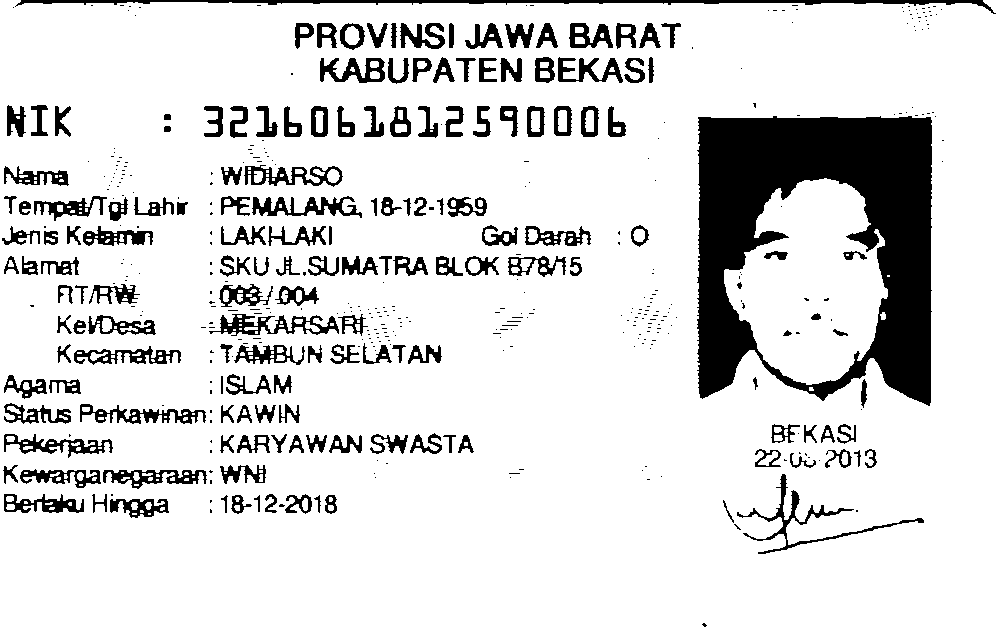

In [29]:
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP_Per7"

# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    img_path = os.path.join(path_plate, name_file)
    src = cv2.imread(img_path)
    blurred = src.copy()
    gray = blurred.copy()

    # Filtering
    for i in range(10):
        blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    # Ubah ke grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menerapkan operasi morfologi (erosi dan dilasi)
    kernel = np.ones((2, 3), np.uint8)  # Kernel untuk operasi morfologi
    erosion = cv2.erode(bw, kernel, iterations=1)
    dilation = cv2.dilate(erosion, kernel, iterations=1)

    # Menampilkan citra hasil operasi morfologi
    cv2_imshow(dilation)
